# Analisa Data E-Commerce Olist

## 1. Objektif Analisis

Pada project Analisa Data E-Commerce ini dibatasi pada 3 objektif yaitu:
1. Mengetahui produk yang paling diminati pelanggan/paling banyak jumlah order nya.
2. Mengetahui total omzet penjualan dari tiap kategori produk.
3. Mengetahui pertumbuhan pemesanan produk dari tiap 10 produk yang paling diminati.

In [1]:
# Import library
import sqlite3 as db
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat koneksi dengan database
con = db.connect('F:\Data Indra\Project\Project SQL\dataset project\olist.db')

## 2. Data Overview

**Pemeriksaan awal dataset**

In [2]:
#menampilkan daftar tabel dari database menggunakan fungsi read_sql_query() dari pandas
df_tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'",con)
print(df_tables)


                                name
0       olist_order_customer_dataset
1                olist_order_dataset
2        olist_order_reviews_dataset
3       olist_order_payments_dataset
4          olist_order_items_dataset
5             olist_products_dataset
6              olist_sellers_dataset
7          olist_geolocation_dataset
8  product_category_name_translation


**Pemeriksaan isi masing-masing tabel pada dataset**

In [3]:
#untuk mengetahui isi masing-masing tabel pada dataset dibuat dataframe menggunakan pandas 
#untuk menampilkan nama kolom dari dataframe menggunakan fungsi df.columns

#1. membuat dataframe olist_order_customer_dataset menggunakan fungsi read_sql_query() pandas
df_order_customer = pd.read_sql_query('SELECT * FROM olist_order_customer_dataset', con)

#menampilkan list kolom dari tabel olist_order_customer_dataset
print(list(df_order_customer.columns))

['index', 'customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


In [34]:
#2. membuat dataframe olist_order_dataset menggunakan fungsi read_sql_query() pandas
df_order = pd.read_sql_query('SELECT * FROM olist_order_dataset', con)
#menampilkan list kolom dari tabel olist_order_customer_dataset
print(list(df_order.columns))

['index', 'order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


In [12]:
#3. membuat dataframe olist_order_reviews_dataset menggunakan fungsi read_sql_query() pandas
df_order_reviews = pd.read_sql_query('SELECT * FROM olist_order_reviews_dataset', con)

#menampilkan list kolom dari tabel olist_order_customer_reviews_dataset
print(list(df_order_reviews.columns))

['index', 'review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']


In [13]:
#4. membuat dataframe olist_order_payments_dataset menggunakan fungsi read_sql_query() pandas
df_order_payments = pd.read_sql_query('SELECT * FROM olist_order_payments_dataset', con)

#menampilkan list kolom dari tabel olist_order_customer_dataset
print(list(df_order_payments.columns))

['index', 'order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']


In [14]:
#5. membuat dataframe olist_order_items_dataset menggunakan fungsi read_sql_query() pandas
df_order_items = pd.read_sql_query('SELECT * FROM olist_order_items_dataset', con)

#menampilkan list kolom dari tabel olist_order_customer_dataset
print(list(df_order_items.columns))

['index', 'order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']


In [15]:
#6. membuat dataframe olist_products_dataset menggunakan fungsi read_sql_query() pandas
df_order_products = pd.read_sql_query('SELECT * FROM olist_products_dataset', con)

#menampilkan list kolom dari tabel olist_products_dataset
print(list(df_order_products.columns))

['index', 'product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']


In [16]:
#7. membuat dataframe olist_sellers_dataset menggunakan fungsi read_sql_query() pandas
df_order_sellers = pd.read_sql_query('SELECT * FROM olist_sellers_dataset', con)

#menampilkan list kolom dari tabel olist_products_dataset
print(list(df_order_sellers.columns))

['index', 'seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']


In [17]:
#8. membuat dataframe olist_geolocation_dataset menggunakan fungsi read_sql_query() pandas
df_order_geolocation = pd.read_sql_query('SELECT * FROM olist_geolocation_dataset', con)

#menampilkan list kolom dari tabel olist_geolocation_dataset
print(list(df_order_geolocation.columns))

['index', 'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']


In [18]:
#9. membuat dataframe product_category_name_translation menggunakan fungsi read_sql_query() pandas
df_product_category_name = pd.read_sql_query('SELECT * FROM product_category_name_translation', con)

#menampilkan list kolom dari tabel product_category_name_translation
print(list(df_product_category_name))

['index', 'product_category_name', 'product_category_name_english']


**Membuat tabel data yang diperlukan untuk menjawab objektif**

In [4]:
#membuat dataframe untuk tabel dan kolom yang diperlukan untuk menjawab objektif
df_order_use = pd.read_sql_query("SELECT order_id, order_purchase_timestamp FROM olist_order_dataset", con)
df_order_items_use = pd.read_sql_query("SELECT order_id, product_id, price FROM olist_order_items_dataset", con)
df_product_use = pd.read_sql_query("SELECT product_id, product_category_name FROM olist_products_dataset", con)
df_product_english = pd.read_sql_query("SELECT product_category_name, product_category_name_english FROM product_category_name_translation", con)

#menggabungkan semua tabel yang diperlukan (sesuai objektif) secara bertahap sesuai relasinya
#1.menggabungkan tabel df_product_use dan df_product_english
product_use_english = pd.merge(df_product_use, df_product_english, on='product_category_name')

#2.menggabungkan tabel df_order_items_use dan df_product_use_english
order_items_use_product = pd.merge(df_order_items_use, product_use_english, on='product_id')

#3.menggabungkan tabel df_order_use dan order_items_use_product
olist_analysis_dataset = pd.merge(df_order_use, order_items_use_product, on='order_id')

#4. Menggandakan olist_analysis_dataset untuk back up jika ada salah proses data
olist_dataset_use = olist_analysis_dataset.copy()
olist_dataset_use


,order_id,order_purchase_timestamp,product_id,price,product_category_name,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,118.70,perfumaria,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,159.90,automotivo,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,pet_shop,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,19.90,papelaria,stationery
...,...,...,...,...,...,...
111018,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,bebes,baby
111019,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,b80910977a37536adeddd63663f916ad,205.99,eletrodomesticos_2,home_appliances_2
111020,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,informatica_acessorios,computers_accessories
111021,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,informatica_acessorios,computers_accessories


## 3. Eksplorasi dan Pemrosesan Data

In [5]:
#Pemeriksaan missing value (null), duplicate data, outlier, dan inconsistent format
#menampilkan info dataset
print(olist_dataset_use.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111023 entries, 0 to 111022
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       111023 non-null  object 
 1   order_purchase_timestamp       111023 non-null  object 
 2   product_id                     111023 non-null  object 
 3   price                          111023 non-null  float64
 4   product_category_name          111023 non-null  object 
 5   product_category_name_english  111023 non-null  object 
dtypes: float64(1), object(5)
memory usage: 5.9+ MB
None


In [6]:
#1. memeriksa missing value
#jumlahkan semua missing value (null) pada dataset pisahkan dari Non-Null
missing = olist_dataset_use.isnull().sum()[olist_dataset_use.isnull().sum() > 0]

#membuat dataframe Nan_count dan NAN_percentage
missing_olist_dataset_use = pd.DataFrame({'NaN_count': missing, 'NaN_percentage': missing/ len(olist_dataset_use)}).sort_values(by = 'NaN_percentage')

#menampilkan dataframe
print(missing_olist_dataset_use)

Empty DataFrame
Columns: [NaN_count, NaN_percentage]
Index: []


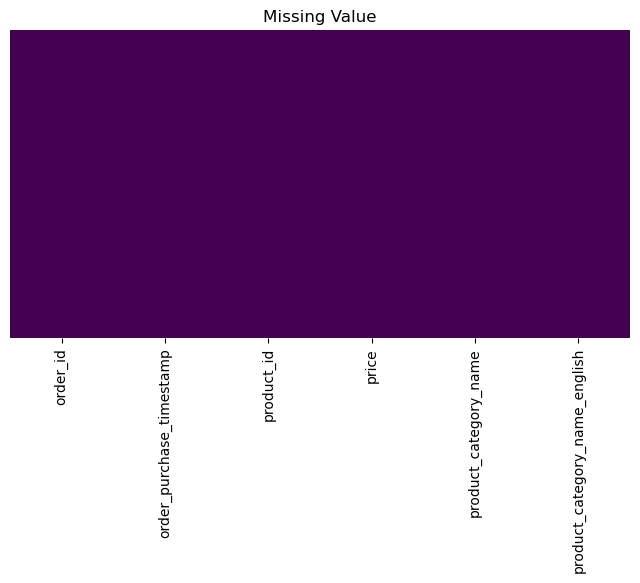

In [11]:
# Visualisasi missing value
plt.figure(figsize=(8, 4))
sns.heatmap(olist_dataset_use.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing Value")
plt.show()

Kesimpulan: berdasarkan info dataset, pemeriksaan missing value (null value) dan visualisasi heatmap dipastikan tidak ada null value pada olist_dataset_use.

In [26]:
#2. memeriksa data duplicate
print(olist_dataset_use.duplicated().sum())

10080


In [5]:
#jumlahkan semua data duplicate pada dataset pisahkan dari Non-duplicate
duplicated_data = olist_dataset_use.duplicated().sum()[olist_dataset_use.duplicated().sum() > 0]
#membuat dataframe duplicate dan duplicate_percentage
duplicated_olist_dataset_use = pd.DataFrame({'duplicated_count': duplicated_data, 'duplicated_percentage': duplicated_data/ len(olist_dataset_use)})
duplicated_olist_dataset_use

,duplicated_count,duplicated_percentage
0,10080,0.090792


In [27]:
duplicateRows = olist_dataset_use[olist_dataset_use.duplicated(['order_id', 'product_id', 'order_purchase_timestamp'])]
print(duplicateRows)

                                order_id order_purchase_timestamp  \
10      e6ce16cb79ec1d90b1da9085a6118aeb      2017-05-16 19:41:10   
54      9faeb9b2746b9d7526aef5acb08e2aa0      2018-07-26 14:39:59   
60      66e4624ae69e7dc89bd50222b59f581f      2018-03-09 14:50:15   
70      f271576bed568e896f99eb710cd3a6f8      2018-01-07 21:44:54   
73      68e48e68da1f50f7c5838ea75e3a20dd      2018-06-18 16:02:23   
...                                  ...                      ...   
110945  dbd4cbb492a12b99c5224014930acc18      2017-03-26 14:12:46   
110968  83db27f85506380229913b0dfdf5cd18      2018-04-18 12:35:58   
110976  b3112ca67f3afd4e20cf2ee91fc4f804      2018-08-02 22:46:54   
110995  e8fd20068b9f7e6ec07068bb7537f781      2017-08-10 21:21:07   
111021  11c177c8e97725db2631073c19f07b62      2018-01-08 21:28:27   

                              product_id   price  \
10      08574b074924071f4e201e151b152b4e   99.00   
54      f48eb5c2fde13ca63664f0bb05f55346   60.00   
60      b37b72d

kesimpulan: Dari hasil pemeriksaan duplikasi data terlihat ada 10080 baris data yang sama dengan baris data sebelumnya.
Data duplikat ini selanjutnya akan ditangani dengan cara dihilangkan menggunakan fungsi drop_duplicates()

In [9]:
#Menangani Duplicate Data menggunakan fungsi drop_duplicates()
#menggandakan olist_dataset_use untuk backup jika terjadi kesalahan proses
olist_dataset_use2 = olist_dataset_use.copy()

#menghilangkan data duplicated dengan nilai order_id, product_id dan timestamp pembelian yang sama dan menjaga data yang pertama muncul.
olist_dataset_use2 = olist_dataset_use2.drop_duplicates(subset=['order_id', 'product_id', 'order_purchase_timestamp'], keep='first')

#memeriksa kembali kemungkinan dupliasi data
duplicated_check = olist_dataset_use.duplicated().sum()
duplicated_drop_check = olist_dataset_use2.duplicated().sum()

print(f'Jumlah data duplikat sebelum ditangani = {duplicated_check}.')
print(f'Jumlah data duplikat setelah ditangani = {duplicated_drop_check}.')


Jumlah data duplikat sebelum ditangani = 10080.
Jumlah data duplikat setelah ditangani = 0.


Kesimpulan: berdasarkan pemeriksaan kembali hasil penanganan data duplikat dari dataset olist_dataset_use2 tidak ada lagi duplikasi data.

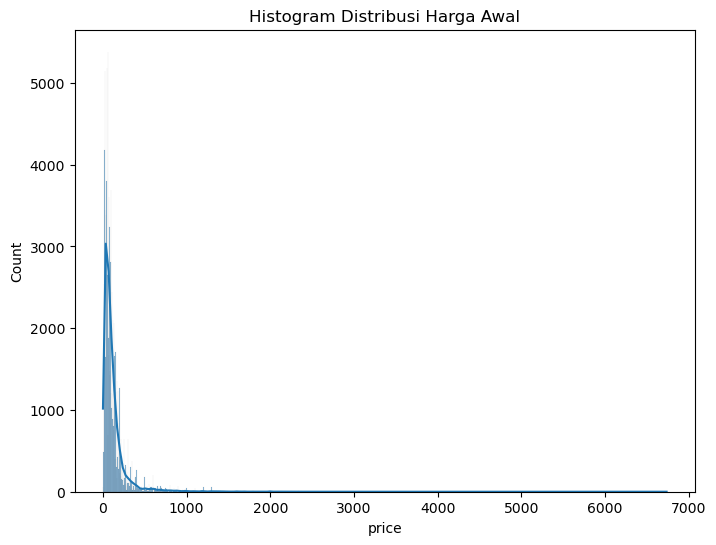

In [32]:
#3. memeriksa outlier
# Membuat plot histogram distribusi harga menggunakan matplotlib
plt.figure(figsize=(8, 6))
sns.histplot(olist_dataset_use2['price'], kde=True)
plt.title("Histogram Distribusi Harga Awal")
plt.show()


Dari histogram terlihat grafiknya distibusinya skew (mengekor) ke kanan dan cukup jauh dari puncaknya, menandakan adanya outlier. Untuk menanganinya digunakan metode IQR.

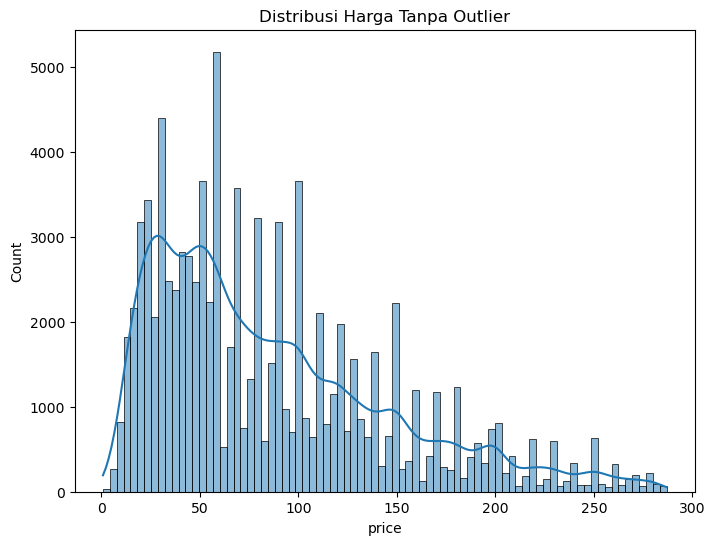

In [10]:
# Menangani Outliers menggunakan metode IQR 
# Menggandakan olist_dataset_use2 untuk back up jika terjadi kesalahan proses
olist_dataset_use3 = olist_dataset_use2.copy()

Q1 = olist_dataset_use3['price'].quantile(0.25)
Q3 = olist_dataset_use3['price'].quantile(0.75)
IQR = Q3 - Q1
price_outliers = olist_dataset_use3[(olist_dataset_use3['price'] < (Q1 - 1.5 * IQR)) | (olist_dataset_use3['price'] > (Q3 + 1.5 * IQR))]
olist_dataset_use3 = olist_dataset_use3[~olist_dataset_use3.index.isin(price_outliers.index)]

# Visualisasi distribusi harga setelah menangani outlier
plt.figure(figsize=(8, 6))
sns.histplot(olist_dataset_use3['price'], kde=True)
plt.title("Distribusi Harga Tanpa Outlier")
plt.show()

Dari histogram terlihat grafiknya distibusinya sudah mendekati normal, menandakan outlier sudah ditangani dengan baik.

In [11]:
#4. memeriksa Inconsistent Format :
#menampilkan info dataset
print(olist_dataset_use3.info())
olist_dataset_use3

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93302 entries, 0 to 111022
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       93302 non-null  object 
 1   order_purchase_timestamp       93302 non-null  object 
 2   product_id                     93302 non-null  object 
 3   price                          93302 non-null  float64
 4   product_category_name          93302 non-null  object 
 5   product_category_name_english  93302 non-null  object 
dtypes: float64(1), object(5)
memory usage: 5.0+ MB
None


,order_id,order_purchase_timestamp,product_id,price,product_category_name,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,118.70,perfumaria,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,159.90,automotivo,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,pet_shop,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,19.90,papelaria,stationery
...,...,...,...,...,...,...
111017,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,ac35486adb7b02598c182c2ff2e05254,72.00,beleza_saude,health_beauty
111018,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,bebes,baby
111019,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,b80910977a37536adeddd63663f916ad,205.99,eletrodomesticos_2,home_appliances_2
111020,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,informatica_acessorios,computers_accessories


Dari info dataset dan tampilan isi tabel, kolom order_purchase_timestamp bertipe datetime namun masih tertulis object.
Untuk menanganinya dengan mengubah type datanya dengan fungsi to_datetime() pandas. 

In [12]:
# Menangani Inconsistent (mengubah type data kolom order_purchase_timestamp menjadi datetime)
# menggandakan olist_dataset_use3 untuk back up jika salah proses data.
olist_dataset_use4 = olist_dataset_use3.copy()

olist_dataset_use4['order_purchase_timestamp'] = pd.to_datetime(olist_dataset_use4 ['order_purchase_timestamp'])

In [13]:
#menampilkan info dataset setelah perubahan type data 
print(olist_dataset_use4.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93302 entries, 0 to 111022
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       93302 non-null  object        
 1   order_purchase_timestamp       93302 non-null  datetime64[ns]
 2   product_id                     93302 non-null  object        
 3   price                          93302 non-null  float64       
 4   product_category_name          93302 non-null  object        
 5   product_category_name_english  93302 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 5.0+ MB
None


Dari info diatas type data order_purchase_timestamp sudah berubah menjadi datetime64[ns], maka inconsistent format sudah tertangani. Untuk selanjutnya dataset olist_dataset_use4 bisa digunakan untuk menjawab objektif.

## 4.	Analisa Data

### 1. Mengetahui produk yang paling diminati pelanggan

In [14]:
# menghitung jumlah pembelian per kategori produk
ordered_product_count = olist_dataset_use4.groupby(['product_category_name_english'])['order_id'].count().reset_index()

# menyusun top 10 kategori produk yang diminati berdasarkan jumlah pembelian
top10_popular_product = ordered_product_count.sort_values('order_id', ascending=False).head(10)

#menampilkan hasil top 10 kategori produk paling diminati
print(top10_popular_product)

   product_category_name_english  order_id
7                 bed_bath_table      9996
43                 health_beauty      7911
65                sports_leisure      7425
15         computers_accessories      6556
39               furniture_decor      6549
49                    housewares      5740
70                 watches_gifts      4888
68                     telephony      4092
69                          toys      3652
5                           auto      3609


[Text(0, 0.5, 'Kategori Produk')]

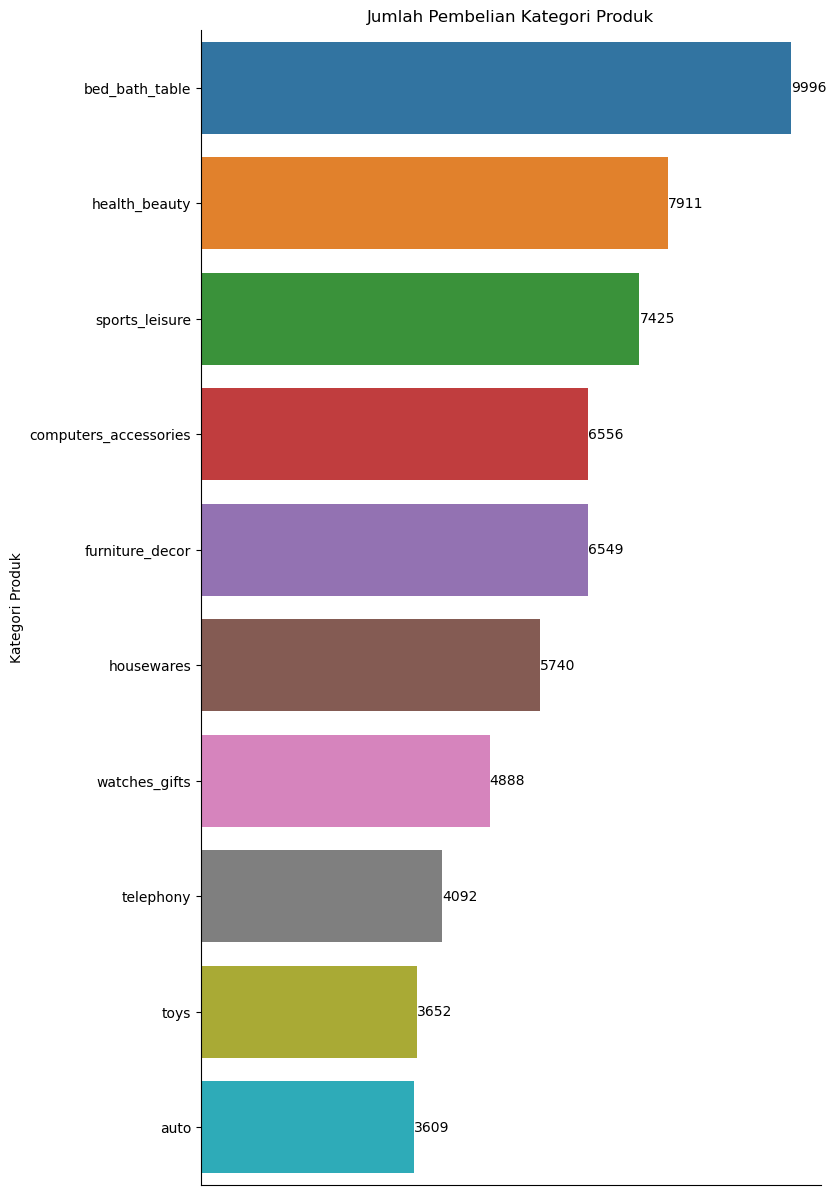

In [15]:
# membuat visualisasi horizontal bar plot top 10 produk populer menggunakan library matplotlib 

fig, ax = plt.subplots(figsize=(8, 15))

ax = sns.barplot(data=top10_popular_product, y='product_category_name_english', x='order_id',
                 orient='h',
                 order=top10_popular_product.sort_values('order_id', ascending=False).product_category_name_english)

for i in ax.containers:
    ax.bar_label(i,)

sns.despine()
ax.set(title='Jumlah Pembelian Kategori Produk')
ax.set(xlabel=None)
ax.set(xticks=[])
ax.set(ylabel='Kategori Produk')

Dari hasil perhitungan dan grafik terlihat top 10 produk yang diminati, dimana kategori produk bed_bath_table adalah no 1 paling diminati pelanggan.

### 2. Mengetahui total omzet penjualan tiap kategori produk

In [16]:
# Menambah kolom baru pada ordered_product_count
omzet_penjualan = olist_dataset_use4.groupby(['product_category_name_english', 'price'])['order_id'].count().reset_index()
#menambah kolom omzet sebagai perkalian jumlah order x harga : 
print(omzet_penjualan)


      product_category_name_english   price  order_id
0        agro_industry_and_commerce   12.99         1
1        agro_industry_and_commerce   13.00         1
2        agro_industry_and_commerce   19.50        12
3        agro_industry_and_commerce   21.99         8
4        agro_industry_and_commerce   22.00         3
...                             ...     ...       ...
14345                 watches_gifts  284.80         4
14346                 watches_gifts  284.90         2
14347                 watches_gifts  285.00         3
14348                 watches_gifts  285.60         1
14349                 watches_gifts  285.99         1

[14350 rows x 3 columns]


In [19]:
omzet_penjualan['omzet'] = omzet_penjualan['price'] * omzet_penjualan['order_id']
print(omzet_penjualan)

      product_category_name_english   price  order_id    omzet
0        agro_industry_and_commerce   12.99         1    12.99
1        agro_industry_and_commerce   13.00         1    13.00
2        agro_industry_and_commerce   19.50        12   234.00
3        agro_industry_and_commerce   21.99         8   175.92
4        agro_industry_and_commerce   22.00         3    66.00
...                             ...     ...       ...      ...
14345                 watches_gifts  284.80         4  1139.20
14346                 watches_gifts  284.90         2   569.80
14347                 watches_gifts  285.00         3   855.00
14348                 watches_gifts  285.60         1   285.60
14349                 watches_gifts  285.99         1   285.99

[14350 rows x 4 columns]


In [20]:
total_omzet_per_category = omzet_penjualan.groupby('product_category_name_english')['omzet'].sum().reset_index()
print(total_omzet_per_category)

   product_category_name_english      omzet
0     agro_industry_and_commerce    7313.33
1               air_conditioning   26716.29
2                            art   17058.17
3          arts_and_craftmanship    1524.52
4                          audio   25990.50
..                           ...        ...
66                    stationery  197612.72
67        tablets_printing_image    6282.62
68                     telephony  197519.72
69                          toys  321798.93
70                 watches_gifts  584650.29

[71 rows x 2 columns]


In [21]:
# menyusun top 10 kategori produk yang diminati berdasarkan jumlah pembelian
top10_omzet_product = total_omzet_per_category.sort_values('omzet', ascending=False).head(10)
print(top10_omzet_product)

   product_category_name_english      omzet
7                 bed_bath_table  883126.89
65                sports_leisure  676068.54
43                 health_beauty  648702.60
15         computers_accessories  592233.74
70                 watches_gifts  584650.29
39               furniture_decor  538438.41
49                    housewares  431550.48
20                    cool_stuff  398872.93
5                           auto  326628.15
69                          toys  321798.93


[Text(0, 0.5, 'Kategori Produk')]

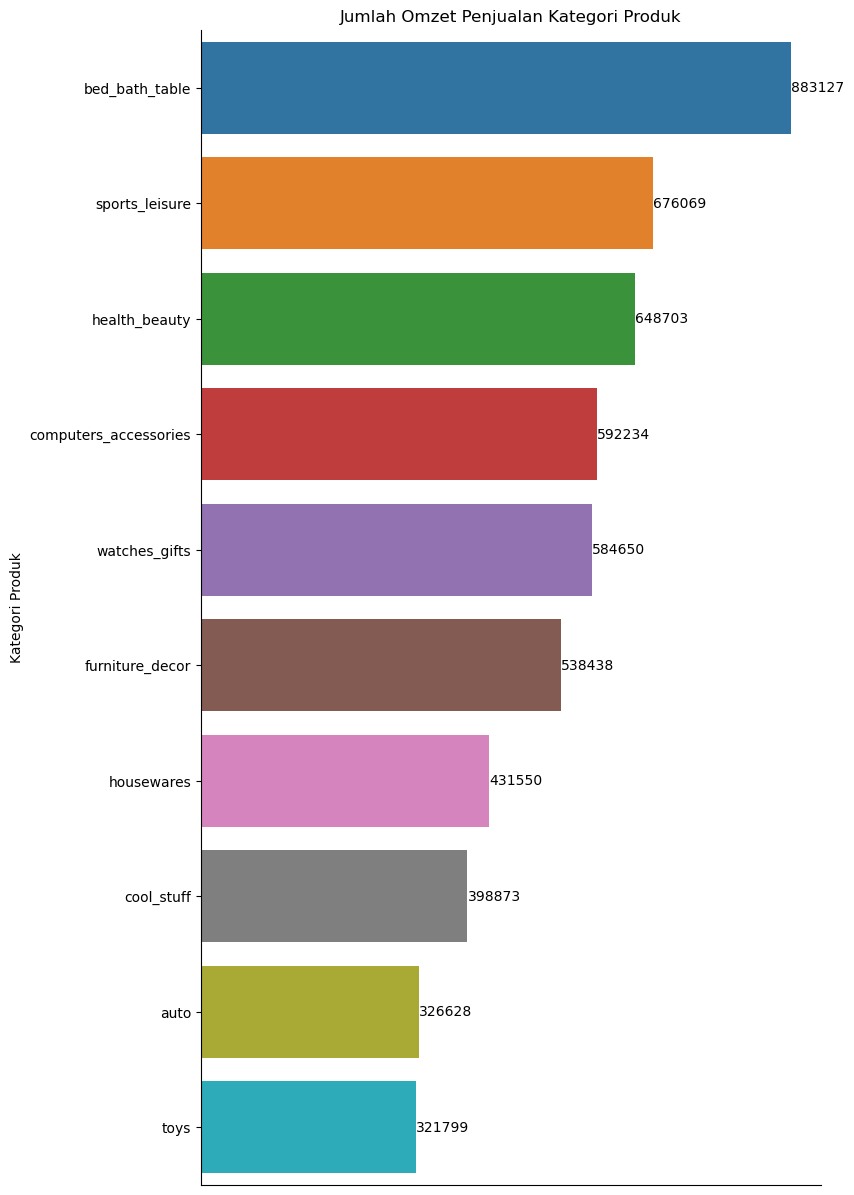

In [22]:
# membuat visualisasi horizontal bar plot top 10 produk dengan omzet penjualan tertinggi 

fig, ax = plt.subplots(figsize=(8, 15))

ax = sns.barplot(data=top10_omzet_product, y='product_category_name_english', x='omzet',
                 orient='h',
                 order=top10_omzet_product.sort_values('omzet', ascending=False).product_category_name_english)

for i in ax.containers:
    ax.bar_label(i,)

sns.despine()
ax.set(title='Jumlah Omzet Penjualan Kategori Produk')
ax.set(xlabel=None)
ax.set(xticks=[])
ax.set(ylabel='Kategori Produk')

Berdasarkan perhitungan dan visualisasi omzet per kategori produk didapatkan urutan top 10 yang sedikit berbeda dengan urutan top 10 jumlah penjualan, namun untuk no 1 tetap kategori produk bed_bath_table.

### 3. Pertumbuhan pembelian produk dari produk yang paling diminati

Dari hasil analisa top 10 kategori produk yang paling diminati akan dianalisa pertumbuhan per tahunnya. 

In [34]:
print(top10_popular_product)

   product_category_name_english  order_id
7                 bed_bath_table      9996
43                 health_beauty      7911
65                sports_leisure      7425
15         computers_accessories      6556
39               furniture_decor      6549
49                    housewares      5740
70                 watches_gifts      4888
68                     telephony      4092
69                          toys      3652
5                           auto      3609


In [23]:
#ordered_product_yearly = olist_dataset_use4.groupby(['product_category_name_english'])['order_id'].count().reset_index()
#menggandakan olist_dataset_use4
olist_dataset_use5 = olist_dataset_use4.copy()
olist_dataset_use5['order_purchase_timestamp_yearly'] = olist_dataset_use5['order_purchase_timestamp'].dt.year
olist_dataset_use5

,order_id,order_purchase_timestamp,product_id,price,product_category_name,product_category_name_english,order_purchase_timestamp_yearly
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas,housewares,2017
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,118.70,perfumaria,perfumery,2018
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,159.90,automotivo,auto,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,pet_shop,pet_shop,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,19.90,papelaria,stationery,2018
...,...,...,...,...,...,...,...
111017,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,ac35486adb7b02598c182c2ff2e05254,72.00,beleza_saude,health_beauty,2017
111018,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,bebes,baby,2018
111019,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,b80910977a37536adeddd63663f916ad,205.99,eletrodomesticos_2,home_appliances_2,2017
111020,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,informatica_acessorios,computers_accessories,2018


In [24]:
# 1 pertumbuhan pemebelian produk bed_bath_table
bed_bath_table_order = olist_dataset_use5[olist_dataset_use5.product_category_name_english == 'bed_bath_table']
bed_bath_table_order

,order_id,order_purchase_timestamp,product_id,price,product_category_name,product_category_name_english,order_purchase_timestamp_yearly
13,5ff96c15d0b717ac6ad1f3d77225a350,2018-07-25 17:44:10,10adb53d8faa890ca7c2f0cbcb68d777,19.90,cama_mesa_banho,bed_bath_table,2018
18,85ce859fd6dc634de8d2f1e290444043,2017-11-21 00:03:41,cce679660c66e6fbd5c8091dfd29e9cd,17.90,cama_mesa_banho,bed_bath_table,2017
40,7206b86ea789983f7a273ea7fa0bc2a8,2018-03-26 17:12:18,9a469eaf45dfbc43d39ba1977a3c07af,36.90,cama_mesa_banho,bed_bath_table,2018
63,68873cf91053cd11e6b49a766db5af1a,2017-11-30 22:02:15,15a9e834e89eab39d973492882c658d6,79.90,cama_mesa_banho,bed_bath_table,2017
96,10c320f977c6a18f91b2d14be13128c6,2017-05-09 20:48:59,b3be1f83cef05668c25e134852d44545,110.99,cama_mesa_banho,bed_bath_table,2017
...,...,...,...,...,...,...,...
110955,a6bd1f93b7ff72cc348ca07f38ec4bee,2018-04-20 17:28:40,c045b19fdb30a3035c56d04c6fe2e622,59.90,cama_mesa_banho,bed_bath_table,2018
110980,a3480694574e74545579bf7d974318d0,2018-02-14 17:54:39,1a428b685ede76217c9efb550c4aaa59,22.90,cama_mesa_banho,bed_bath_table,2018
110982,41d74f5b8f1fb05bdec674cbba8f720f,2018-02-04 14:35:02,6fdbc2d597f906254d258d8d64d71925,39.00,cama_mesa_banho,bed_bath_table,2018
111001,6f46d42016226f77893ed3978d6903d0,2017-07-05 15:55:19,9cbe4a1fd4db99c14512e9b2ff033ec4,27.90,cama_mesa_banho,bed_bath_table,2017


In [25]:
bed_bath_table_order_yearly = bed_bath_table_order.groupby('order_purchase_timestamp_yearly')['order_id'].count().reset_index()
bed_bath_table_order_yearly

,order_purchase_timestamp_yearly,order_id
0,2016,6
1,2017,4767
2,2018,5223


[Text(0, 0.5, 'Jumlah Pembelian')]

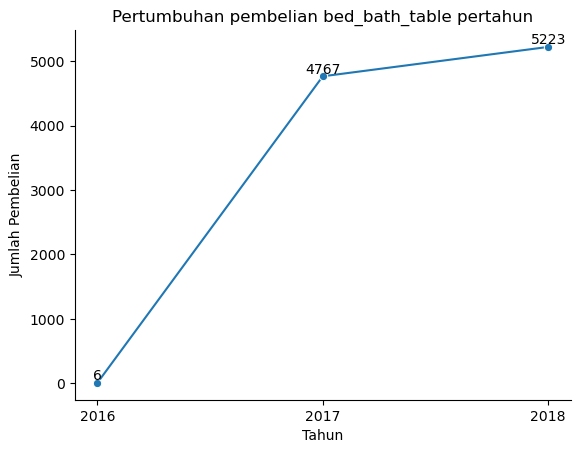

In [26]:
# membuat lineplot pertumbuhan pembelian kategori produk bed_bath_table pertahun

ax = sns.lineplot(data=bed_bath_table_order_yearly, y='order_id', x='order_purchase_timestamp_yearly', marker='o')

for index, row in bed_bath_table_order_yearly.iterrows():
    plt.text(row['order_purchase_timestamp_yearly'], row['order_id'], str(row['order_id']),
             ha='center', va='bottom')

plt.xticks([2016, 2017, 2018])
sns.despine()
ax.set(title='Pertumbuhan pembelian bed_bath_table pertahun')
ax.set(xlabel='Tahun')
ax.set(ylabel='Jumlah Pembelian')